# Designing a Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
class LinearRegression:
  # constructor basically used to initialise the values of the hyperparameters
  def __init__(self,learning_rate=0.01,epochs=100,batch_size=32):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.batch_size = batch_size

  # Function to fit the data into the model to tune the self.W and self.b according to gradient descent
  def fit(self,X,y):
    self.X = X
    self.y = y
    self.m = X.shape[0] # m is the number of rows = number of training examples
    self.n = X.shape[1] # n is the no. of col = no. of features the model needs to be trained upon
    self.W = np.zeros((self.n,1))
    self.b = 0
    X_np = np.array(X)
    y_np = y.values.reshape(-1,1)
    for epoch in range(self.epochs):
      # Step 0: first we will shuffle the indices
      indices = np.random.permutation(self.m)
      X_shuffled = X_np[indices]
      y_shuffled = y_np[indices]
      #Each Iteration means one step in gradient descent
      for i in range(0,self.m,self.batch_size):
         #Step 1: First we will make Batches of size batch_size
         X_batch = X_shuffled[i:i+self.batch_size]
         y_batch = y_shuffled[i:i+self.batch_size]
         curr_batch_size = X_batch.shape[0]
         # This prevents any problems in the last batch as it's size need not be batch_size

         #Step 2: Calculate the prediction values
         y_pred = X_batch@self.W + self.b
         # y_pred is a bx1 vector , NOTE that adding the scaler self.b to the vector X_batch@self.W adds bias b to each and every term of the vector
         error = y_pred - y_batch


         #Step 3: Calculating the Gradient of L wrt W and b
         grad_W = (1/curr_batch_size)*X_batch.T@error
         grad_b = (1/curr_batch_size)*np.sum(error)

         #Step 4: Update Weights and Biases according to the rule
         self.W = self.W - self.learning_rate*grad_W
         self.b = self.b - self.learning_rate*grad_b

    # simply fit step me jo W and b tune ho ho ke bana hai usi ko use karke bas return karna hai!
  def predict(self,X):
      return X@self.W + self.b

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Dummy Data HSS.csv to Dummy Data HSS (1).csv


# Exploratory Data Analysis

In [4]:
df = pd.read_csv("Dummy Data HSS.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB
None
                TV        Radio  Social Media        Sales
count  4562.000000  4568.000000   4566.000000  4566.000000
mean     54.066857    18.160356      3.323956   192.466602
std      26.125054     9.676958      2.212670    93.133092
min      10.000000     0.000684      0.000031    31.199409
25%      32.000000    10.525957      1.527849   112.322882
50%      53.000000    17.859513      3.055565   189.231172
75%      77.000000    25.649730      4.807558   272.507922
max     100.000000    48.871161     13.981662   364.079751
TV 

In [6]:
df.dropna(axis=0,inplace=True)
# drop=True prevents the old index from being added as a new column
df = df.reset_index(drop=True)
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


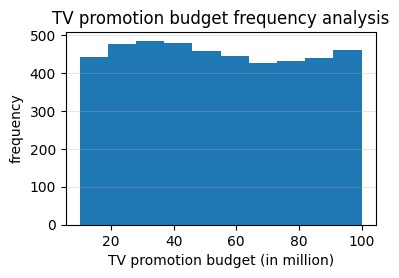

In [7]:
# First We do univariate analysis
plt.figure(figsize=(4, 2.5)) # Set the size of the window

# Plotting the 'TV' column
plt.hist(df['TV'])

plt.title('TV promotion budget frequency analysis')
plt.xlabel('TV promotion budget (in million)')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.3) # Adds a light grid for readability

plt.show()

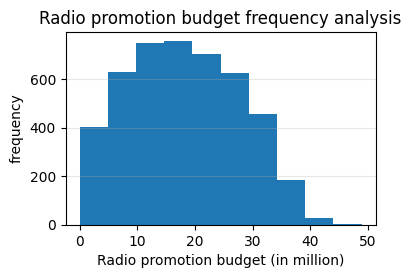

In [8]:
# First We do univariate analysis
plt.figure(figsize=(4, 2.5)) # Set the size of the window

# Plotting the 'Radio' column
plt.hist(df['Radio'])

plt.title('Radio promotion budget frequency analysis')
plt.xlabel('Radio promotion budget (in million)')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.3) # Adds a light grid for readability

plt.show()

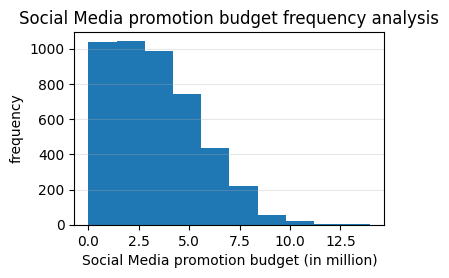

In [9]:
plt.figure(figsize=(4, 2.5)) # Set the size of the window

# Plotting the 'Social media' column
plt.hist(df['Social Media'])

plt.title('Social Media promotion budget frequency analysis')
plt.xlabel('Social Media promotion budget (in million)')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.3) # Adds a light grid for readability

plt.show()

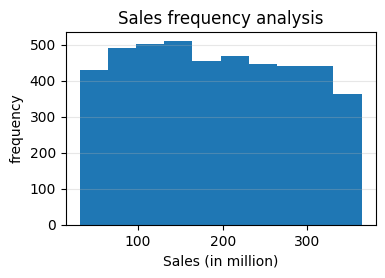

In [10]:
plt.figure(figsize=(4, 2.5)) # Set the size of the window

# Plotting the 'Sales' column
plt.hist(df['Sales'])

plt.title('Sales frequency analysis')
plt.xlabel('Sales (in million)')
plt.ylabel('frequency')
plt.grid(axis='y', alpha=0.3) # Adds a light grid for readability

plt.show()

In [11]:
df["Influencer"].value_counts()
# We keep in mind that we will have to encode the column Influencer into another column

,count
Influencer,
Mega,1152
Micro,1148
Nano,1134
Macro,1112


In [12]:
# We will do one-hot  encoding , in this we will create 4 columns Inf_mega , .......
df['Inf_Mega'] = df['Influencer']
df['Inf_Micro'] = df['Influencer']
df['Inf_Nano'] = df['Influencer']
df['Inf_Macro'] = df['Influencer']
df['Inf_Mega'] = df['Inf_Mega'].replace({'Mega':1,'Micro':0,'Nano':0,'Macro':0})
df['Inf_Macro'] = df['Inf_Macro'].replace({'Mega':0,'Micro':0,'Nano':0,'Macro':1})
df['Inf_Micro'] = df['Inf_Micro'].replace({'Mega':0,'Micro':1,'Nano':0,'Macro':0})
df['Inf_Nano'] = df['Inf_Nano'].replace({'Mega':0,'Micro':0,'Nano':1,'Macro':0})
df.drop('Influencer',axis=1,inplace=True)
df.head()

/tmp/ipython-input-2040818481.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Inf_Mega'] = df['Inf_Mega'].replace({'Mega':1,'Micro':0,'Nano':0,'Macro':0})
/tmp/ipython-input-2040818481.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Inf_Macro'] = df['Inf_Macro'].replace({'Mega':0,'Micro':0,'Nano':0,'Macro':1})
/tmp/ipython-input-2040818481.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

,TV,Radio,Social Media,Sales,Inf_Mega,Inf_Micro,Inf_Nano,Inf_Macro
0,16.0,6.566231,2.907983,54.732757,1,0,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0,0


In [29]:
X=df.drop('Sales',axis=1)
y=df['Sales']

# Train test Split
m = len(X)
indices = np.random.permutation(m)

train_size = int(0.8 * m)
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

In [31]:
#Standard Scaler
X_mean = X_train.mean()
X_std = X_train.std()
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

In [32]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

In [36]:
y_pred = model.predict(X_test_scaled)
y_pred

,0
1604,288.287754
648,356.038500
2729,99.639562
2609,49.638025
3513,60.383230
...,...
3729,60.416483
4320,156.539893
2465,231.331027
3218,160.168508


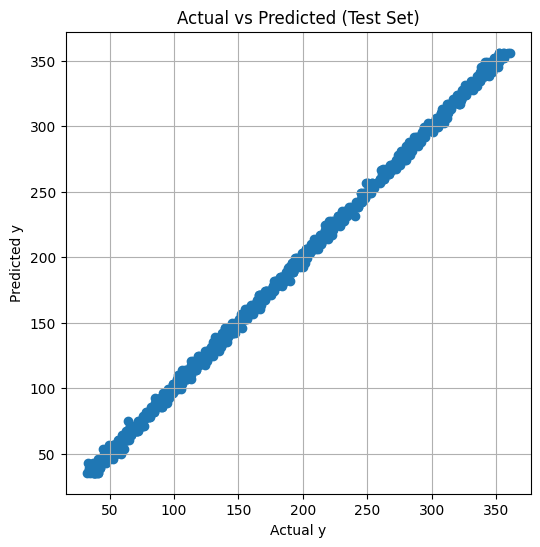

In [37]:
# Graph for Visual analysis
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted (Test Set)")
plt.grid(True)

plt.show()
